<a href="https://colab.research.google.com/github/oisincam/Neural-Networks/blob/main/Data_spotify_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [1]:
from google.colab import files
uploaded = files.upload()

Saving songs_normalize.csv to songs_normalize.csv


In [4]:
dataset = pd.read_csv('/content/songs_normalize.csv')
dataset.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
dataset.describe()

In [ ]:
corr =dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
dataset.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [ ]:
dataset.query('popularity<40')

In [10]:
# we're only doing analyses on years 200-2019, so we need to remove any entries with the other years

In [11]:
data_years_drop=dataset[(dataset['year']<2000) | (dataset['year']>2019)].index 
# this gives indexes of the rows where year is below 2000 or above 2019
dataset =dataset.drop(data_years_drop)

In [12]:
dataset.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [13]:
artists = dataset.artist.value_counts()
artists

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: artist, Length: 819, dtype: int64

In [ ]:
dataset[dataset['artist'] == 'Rihanna']

In [15]:
topartists = artists[:5]
topartists_name = topartists.index

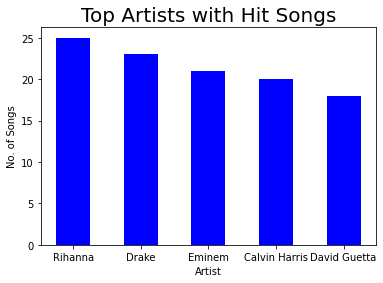

In [16]:
plt.bar(topartists_name,topartists, width = 0.5, color ='blue')
plt.xlabel('Artist')
plt.ylabel('No. of Songs')
plt.title('Top Artists with Hit Songs',color = 'black',fontsize = 20)
plt.show()

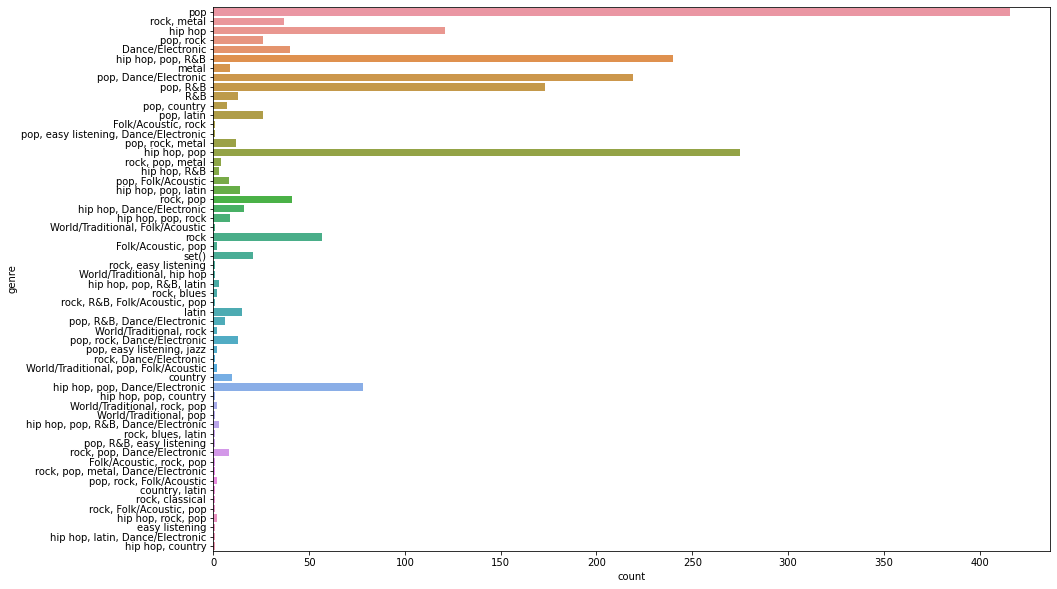

In [17]:
genres = dataset.genre.value_counts()
plt.figure(figsize = (15,10))
sns.countplot(y = 'genre', data = dataset)

Text(0, 0.5, 'No. of Songs')

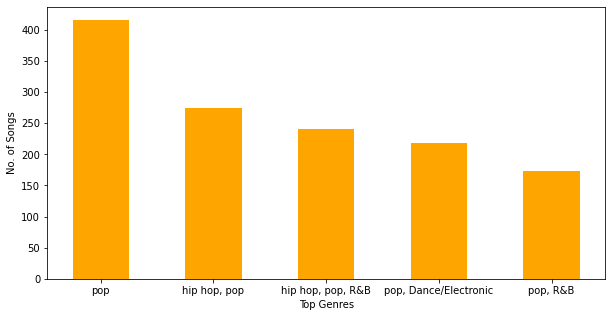

In [ ]:
top_genres = genres[:5]
plt.figure(figsize=(10,5))
plt.bar(top_genres.index,top_genres, color='orange', width = 0.5)
plt.xlabel('Top Genres')
plt.ylabel('No. of Songs')

In [ ]:
def time_convert(ms):
  sec = ms/1000
  return f"{int(sec//60)}:{int(sec%60)}"

In [ ]:
time_convert(78000)

'1:18'

In [ ]:
durations = dataset[['duration_ms','year']].groupby('year').mean().reset_index().iloc[0:20]
durations['min:sec'] = durations['duration_ms'].apply(time_convert)
durations

In [ ]:
x = dataset.year.unique()
x

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014])

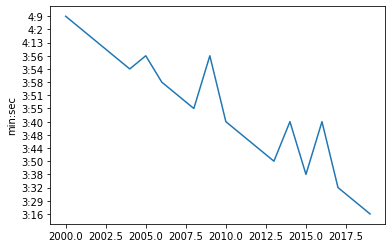

In [ ]:
x = sorted(x)
x = pd.Series(x)
y = durations['min:sec']
sns.lineplot(x,y)

In [ ]:
year_explicit =dataset.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit

explicit,year,False,True
0,2000,62,12
1,2001,85,23
2,2002,60,30
3,2003,74,23
4,2004,60,36
5,2005,75,29
6,2006,69,26
7,2007,72,22
8,2008,74,23
9,2009,61,23


In [ ]:
year_explicit
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)

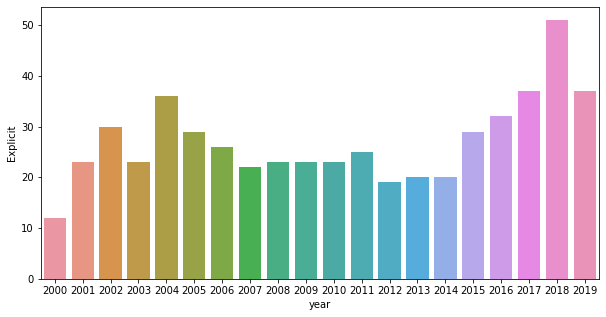

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'year', y = 'Explicit', data = year_explicit)